In [1]:
from src import Modeler, Processor, Reader
import pandas as pd
from datetime import datetime
from sklearn import metrics, model_selection, preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Plotting
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

In [2]:
# Using the US Census regions from here: https://www2.census.gov/geo/pdfs/maps-data/maps/reference/us_regdiv.pdf
south_atlantic_states = [
    10   # Delaware
    , 11 # DC
    , 12 # Florida
    , 13 # Georgia
    , 24 # Maryland
    , 37 # North Carolina
    , 45 # South Carolina
    , 51 # Virginia
    , 54 # West Virginia
]
state_filter = south_atlantic_states

In [3]:
state_dict = {
    'code' : ['10', '11', '12', '13', '24', '37', '45', '51', '54']
    , 'state_name' : ['Delware', 'DC', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'West Virginia']
}

state_code_map = pd.DataFrame(data=state_dict)

## Loading data

In [4]:
# Instantiate preprocessor
#preprocessor = Processor.PreProcessor(state_filter=state_filter)

In [5]:
#preprocessor.load_processed_data()

In [6]:
# Put data into a df to work with
#df = preprocessor.get_current_data()
# Export data to csv so that the data does not have to be recreated each run
#df.to_csv('COVID_Analysis_Data.csv',index=False)
# Show data
#df.head()

In [7]:
# Load data
df = pd.read_csv("COVID_Analysis_Data.csv")

## Split into train and test

In [8]:
modeler = Modeler.Modeler()

In [10]:
# Split data into training and test dataset:
train_end_date = '2021-06-14'
X_train, y_train_cases, y_train_deaths, X_test, y_test_cases, y_test_deaths = modeler.split_train_test(df, train_end_date)

## Plotting functions

In [92]:
def plot_predictions(y_test, y_pred):
    plt.scatter(y_test, y_pred, color='none', edgecolor='b')
    xymin = min(np.min(y_test), np.min(y_pred))
    xymax = max(np.max(y_test), np.max(y_pred))
    plt.plot([xymin, xymax],[xymin, xymax], color="r", linestyle="--")
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actuals vs Predicted', fontsize=16)
    plt.show()
    
def plot_residuals(X_test, residuals):
    plt.figure(figsize=(18, 6))
    sns.scatterplot(x=X_test['days_from_start'], y=residuals, color='none', edgecolor='r')
    plt.title('Residuals', fontsize=16)
    plt.show()

## Modeling functions

In [93]:
def run_full_pipeline(model, X_train, y_train, X_test, y_test):
    # Cross validate and report scores:
    lm_scores = modeler.cv_model(model, X_train, y_train)
    print('Cross-Validation Scores:')
    print('Score: (mean, std)')
    for k, v in lm_scores.items():
        print(f'{k}: {v[0]} +/- {v[1]}')
    # Test data
    y_pred, rmse, r2 = modeler.test_model(model, X_train, y_train, X_test, y_test)
    residuals = (y_test - y_pred)
    # Plots
    plot_predictions(y_test_cases, y_pred_cases_lm)
    plot_residuals(X_test, residuals)
    return y_pred, rmse, r2

## Linear Regression

In [94]:
lm_model = LinearRegression()

### All Data - Cases

Cross-Validation Scores:
Score: (mean, std)
Negative RMSE: -160053912251.23428 +/- 101423677466.20297
r2: -892314827737360.5 +/- 1566997173352786.8
Explained Variance: -846390332095903.8 +/- 1485702557544473.0
RMSE: 15435.42
R^2 Score: 0.74


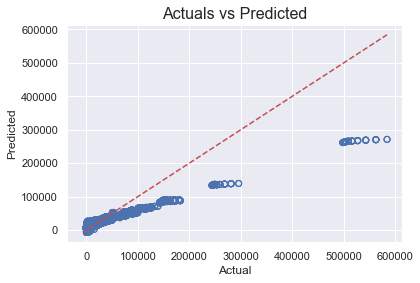

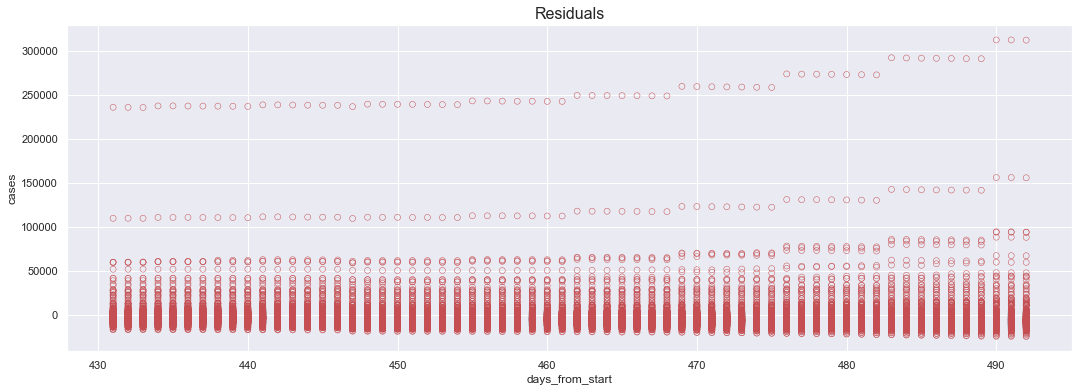

In [99]:
cases_residuals, cases_rmse, cases_r2 = run_full_pipeline(lm_model, X_train, y_train_cases, X_test, y_test_cases)

array([-9.62891369e+01,  1.56046505e+02, -5.84223018e+00,  1.98736804e+02,
       -1.93499230e+02, -2.56131772e+02, -1.22857265e+02, -1.72346474e+02,
        1.09196507e+02,  1.26347317e+03, -1.75438489e+02, -1.16679009e+02,
       -1.09606975e+02, -1.32263617e+02, -3.83449453e+01, -1.10406766e+02,
       -1.65358514e+02, -1.87548318e+02,  3.34856357e+02,  3.14000562e+01,
       -2.66767426e+02, -1.98493927e+02, -2.52373456e+02, -2.65400157e+02,
       -1.81289940e+02, -2.81567930e+02, -1.83509075e+02, -1.74959740e+02,
       -1.53041532e+02, -8.75842627e+01, -1.55338013e+02,  5.73017603e+02,
       -1.73774088e+02, -1.75815699e+02, -1.20996057e+02, -3.04527541e+02,
       -1.84059284e+02, -2.51905157e+01,  2.38884368e+02, -1.63139686e+02,
       -1.83779467e+02, -1.84769777e+02, -1.82872114e+02,  5.69752786e+01,
        1.20990522e+02, -1.49154880e+02,  3.19378964e+03, -2.01459815e+02,
       -2.44846318e+02, -1.30302267e+02, -1.61910050e+02,  3.23546852e+02,
       -5.86810582e+01,  

In [100]:
cases_residuals

array([17157.68246357, 17158.85002892, 17118.75280812, ...,
        3123.36428442,  3155.26921558,  3187.17414674])

In [101]:
# What happens if we remove these outliers?
# Does the model fit improve significantly?
fips_df = pd.DataFrame(X_test[cases_residuals > 100000][[c for c in df.columns if c[:4] == 'FIPS']].sum()).rename(columns={0:'count'})
fips_df[fips_df['count'] > 0]

,count
FIPS_12011,62.0
FIPS_12086,62.0


### All Data - deaths

Cross-Validation Scores:
Score: (mean, std)
Negative RMSE: -1518778116.3462262 +/- 1789813836.2877328
r2: -105884379132783.19 +/- 140029722654213.3
Explained Variance: -103968923476802.9 +/- 138885290393132.19
RMSE: 178.79
R^2 Score: 0.80


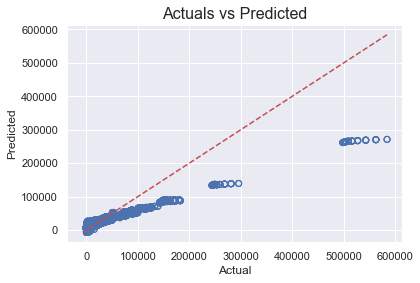

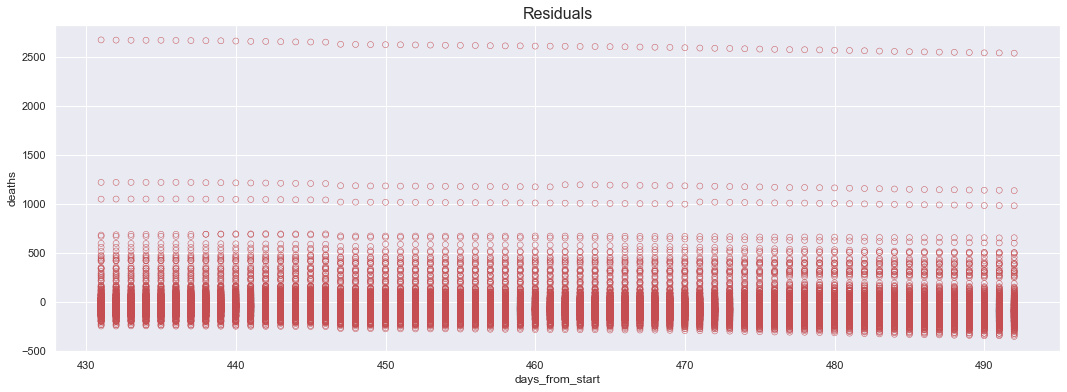

In [102]:
deaths_residuals, deaths_rmse, deaths_r2 = run_full_pipeline(lm_model, X_train, y_train_deaths, X_test, y_test_deaths)

In [103]:
# What happens if we remove these outliers?
# Does the model fit improve significantly?
fips_df = pd.DataFrame(X_test[deaths_residuals > 1000][[c for c in df.columns if c[:4] == 'FIPS']].sum()).rename(columns={0:'count'})
fips_df[fips_df['count'] > 0]

,count
FIPS_11001,62.0
FIPS_12011,62.0
FIPS_12057,62.0
FIPS_12086,62.0
FIPS_12099,62.0
FIPS_12103,62.0
FIPS_24005,46.0
FIPS_24031,62.0
FIPS_24033,62.0


In [ ]:
# It looks like Florida is a big outlier, which we can also see based on the
# visualization for cases by date and deaths by date in EHM-exploring-data



### Excluding Florida - cases

In [27]:
# testing out dropping FIPS and seeing if that improves the fit:
data_no_fips = data[[c for c in data.columns if c[:4] != 'FIPS']]

In [28]:
X_train, y_train_cases, y_train_deaths, X_test, y_test_cases, y_test_deaths = modeler.split_train_test(data_no_fips, '2021-06-14')

In [29]:
modeler.cv_model(model, X_train, y_train_cases)

{'Negative RMSE': (-19926305241.19329, 39852579134.37397),
 'r2': (-331332429153951.6, 662664858307903.0),
 'Explained Variance': (-314066126822018.3, 628132253644036.6)}

In [30]:
data_no_fl = data[data['STATE_12'] != 1].drop(['STATE_12'], axis=1)
data_no_fl = data_no_fl.drop([c for c in data_no_fl.columns if c[:7] == 'FIPS_12'], axis=1)

In [31]:
X_train, y_train_cases, y_train_deaths, X_test, y_test_cases, y_test_deaths = modeler.split_train_test(data_no_fl, '2021-06-14')

In [32]:
modeler.cv_model(model, X_train, y_train_cases)

{'Negative RMSE': (-796966335792.468, 884869289939.1213),
 'r2': (-6.431345340581976e+16, 1.0446155089381352e+17),
 'Explained Variance': (-6.085769025607292e+16, 9.922036654706757e+16)}

In [33]:
data_only_va = data[data['STATE_51'] == 1].drop([c for c in data.columns if c[:5] == 'STATE'], axis=1)
data_only_va = data_only_va.drop([c for c in data_only_va.columns if (c[:4] == 'FIPS' and c[:7] != 'FIPS_51')], axis=1)

In [34]:
X_train, y_train_cases, y_train_deaths, X_test, y_test_cases, y_test_deaths = modeler.split_train_test(data_only_va, '2021-06-14')

In [35]:
modeler.cv_model(model, X_train, y_train_cases)

{'Negative RMSE': (-5455.914296819463, 1491.944497017455),
 'r2': (-2.6059631148428637, 2.595949615535293),
 'Explained Variance': (-2.574148663120521, 2.575840084938748)}

RMSE: 4693.97
R^2 Score: 0.75


In [47]:
## Very Optional


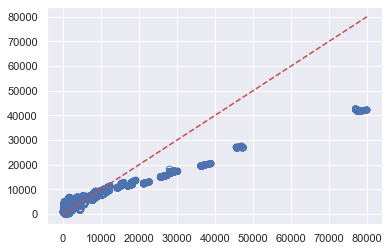

In [49]:
residuals = y_preds - y_test_cases

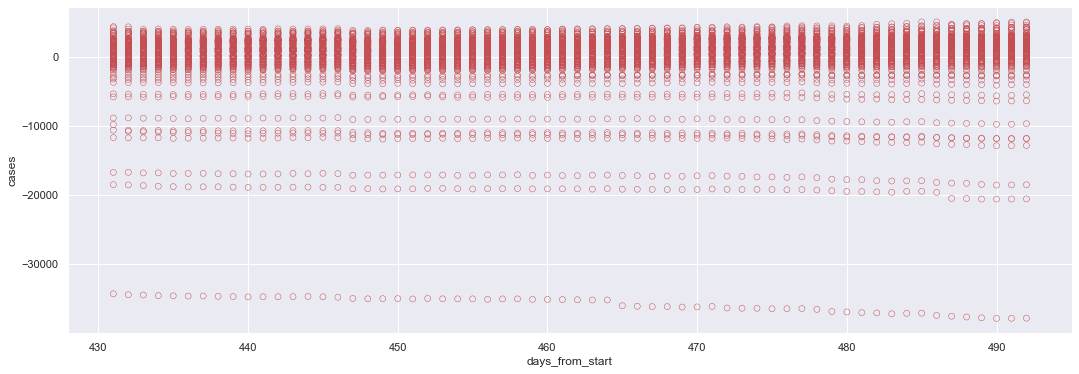

In [29]:
# Test out combining all of the data for a single state and seeing how far off cases/deaths predictions were?


# Decision Tree

In [36]:
# Testing on cases

model_dt = DecisionTreeRegressor()

scores_dt = model_selection.cross_validate(model_dt, X_train, y_train_cases, cv=5, scoring='neg_root_mean_squared_error')
    
## Training model on entire training dataset
model_dt.fit(X_train, y_train_cases)

y_preds_dt = model_dt.predict(X_test)

print()
# The mean square error
rmse_dt = np.sqrt(np.mean((y_preds_dt - y_test_cases) ** 2))



## KNN Regressor

In [47]:
# Testing on cases

model_knn = KNeighborsRegressor()

scores_knn = model_selection.cross_validate(model_knn, X_train, y_train_cases, cv=5, scoring='neg_root_mean_squared_error')
    
## Training model on entire training dataset
model_knn.fit(X_train, y_train_cases)

y_preds_knn = model_knn.predict(X_test)

print()
# The mean square error
rmse_knn= np.sqrt(np.mean((y_preds_knn - y_test_cases) ** 2))



In [48]:
print('Decision tree RMSE:', rmse_dt)
print('Linear Regression RMSE:', rmse)
print('KNN Regression RMSE:', rmse_knn)

Decision tree RMSE: 2528.296114326018
Linear Regression RMSE: 15435.418943826164
KNN Regression RMSE: 27567.813074539386


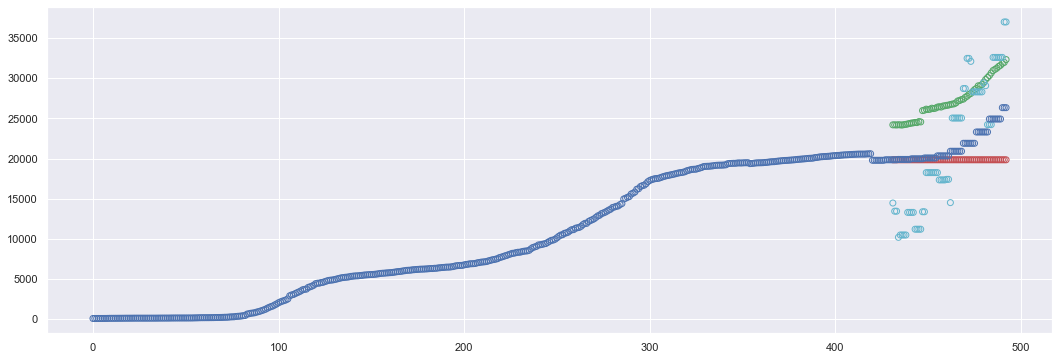

In [55]:
# Checking out how the prediction looked vs the model
county_mask = X_test['FIPS_12005'] == 1
county_mask_train = X_train['FIPS_12005'] == 1
plt.figure(figsize=(18, 6))
plt.scatter(x=X_test[county_mask]['days_from_start'], y=y_preds_dt[county_mask], color='none', edgecolor='r')
plt.scatter(x=X_test[county_mask]['days_from_start'], y=y_preds[county_mask], color='none', edgecolor='g')
plt.scatter(x=X_test[county_mask]['days_from_start'], y=y_preds_knn[county_mask], color='none', edgecolor='c')
plt.scatter(x=X_train[county_mask_train]['days_from_start'], y=y_train_cases[county_mask_train], color='none', edgecolor='b')
plt.scatter(x=X_test[county_mask]['days_from_start'], y=y_test_cases[county_mask], color='none', edgecolor='b');

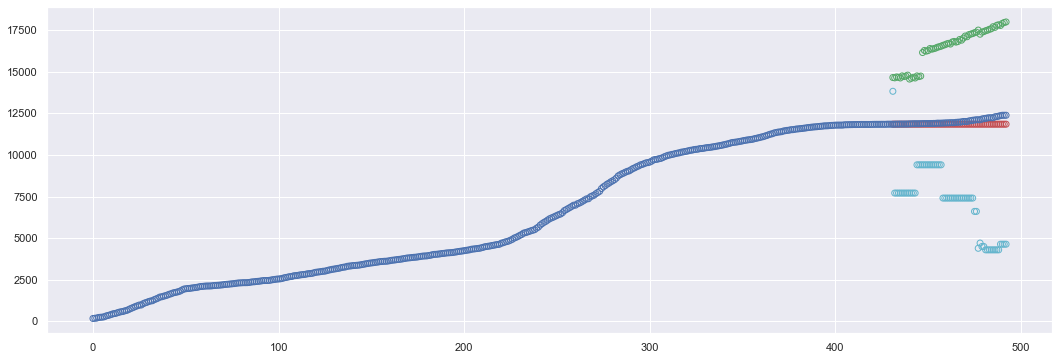

In [54]:
# Checking out how the prediction looked vs the model (Alexandria, VA FIPS 51510)
county_mask = X_test['FIPS_51510'] == 1
county_mask_train = X_train['FIPS_51510'] == 1
plt.figure(figsize=(18, 6))
plt.scatter(x=X_test[county_mask]['days_from_start'], y=y_preds_dt[county_mask], color='none', edgecolor='r')
plt.scatter(x=X_test[county_mask]['days_from_start'], y=y_preds[county_mask], color='none', edgecolor='g')
plt.scatter(x=X_test[county_mask]['days_from_start'], y=y_preds_knn[county_mask], color='none', edgecolor='c')
plt.scatter(x=X_train[county_mask_train]['days_from_start'], y=y_train_cases[county_mask_train], color='none', edgecolor='b')
plt.scatter(x=X_test[county_mask]['days_from_start'], y=y_test_cases[county_mask], color='none', edgecolor='b');

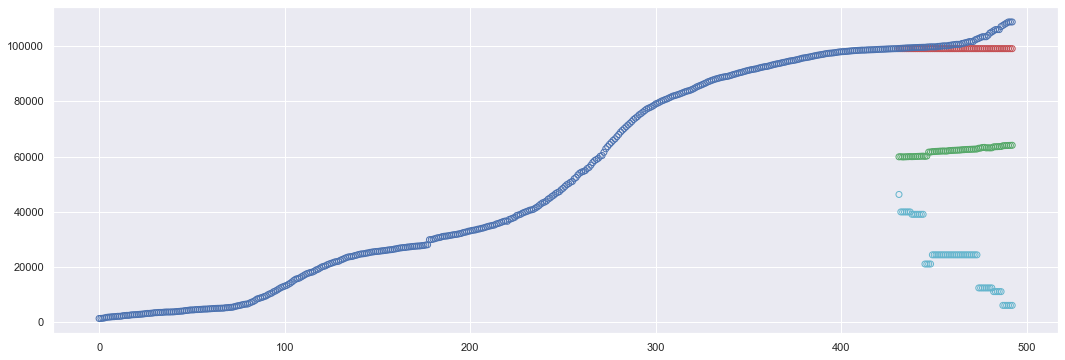

In [53]:
# Checking out how the prediction looked vs the model (Atlanta, GA Fulton county 13121)
county_mask = X_test['FIPS_13121'] == 1
county_mask_train = X_train['FIPS_13121'] == 1
plt.figure(figsize=(18, 6))
plt.scatter(x=X_test[county_mask]['days_from_start'], y=y_preds_dt[county_mask], color='none', edgecolor='r')
plt.scatter(x=X_test[county_mask]['days_from_start'], y=y_preds[county_mask], color='none', edgecolor='g')
plt.scatter(x=X_test[county_mask]['days_from_start'], y=y_preds_knn[county_mask], color='none', edgecolor='c')
plt.scatter(x=X_train[county_mask_train]['days_from_start'], y=y_train_cases[county_mask_train], color='none', edgecolor='b')
plt.scatter(x=X_test[county_mask]['days_from_start'], y=y_test_cases[county_mask], color='none', edgecolor='b');

In [46]:
y_train_cases[county_mask_train].values[-1]

99058.0

In [45]:
y_preds_dt[county_mask]

array([99058., 99058., 99058., 99058., 99058., 99058., 99058., 99058.,
       99058., 99058., 99058., 99058., 99058., 99058., 99058., 99058.,
       99058., 99058., 99058., 99058., 99058., 99058., 99058., 99058.,
       99058., 99058., 99058., 99058., 99058., 99058., 99058., 99058.,
       99058., 99058., 99058., 99058., 99058., 99058., 99058., 99058.,
       99058., 99058., 99058., 99058., 99058., 99058., 99058., 99058.,
       99058., 99058., 99058., 99058., 99058., 99058., 99058., 99058.,
       99058., 99058., 99058., 99058., 99058., 99058.])